<a href="https://colab.research.google.com/github/singwang-cn/The_first_pattern_recognition/blob/master/advanced_ml_mid_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import cvxpy as cp

# Problem 1 (1, 2, 3, 4)

In [ ]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

In [ ]:
#X = np.column_stack((x_d4,np.ones((200, 1))))
X = x_d4[:,:-1]
Y = y_d4

In [ ]:
def loss_func(X, Y, W, lamb):
  return np.log(1 + np.exp(-Y * np.dot(X, W))).sum() + lamb * np.dot(W, W)

def gradient(X, Y, W, lamb):
  ex = np.exp(-Y * np.dot(X, W))
  return np.dot(ex / (1+ex) * (-Y), X) + 2 * lamb * W

def hessian(X, Y, W, lamb):
  ex = np.exp(-Y * np.dot(X, W))
  z = np.sqrt(ex) * (1/(1+ex)) * Y
  X1 = np.expand_dims(z, 1).repeat(X.shape[1], axis=1) + X
  return np.dot(X1.T, X1) + 2 * lamb

In [ ]:
loss_hist_batch = [] # to store the history of loss J(w_t)

# implement batch steepest gradient method here
W = np.random.rand(x_d4.shape[1]-1)
lamb = 0.5
lr = 0.002
for i in range(100):
  loss_hist_batch.append(loss_func(X, Y, W, lamb))
  W -= lr * gradient(X, Y, W, lamb)  

In [ ]:
loss_hist_newton = [] # to store the history of loss J(w_t)

# implement Newton based method here
W = np.random.rand(x_d4.shape[1]-1)
lamb = 0.5
for i in range(100):
  loss_hist_newton.append(loss_func(X, Y, W, lamb))
  H = hessian(X, Y, W, lamb)
  g = gradient(X, Y, W, lamb)
  d = np.dot(g, np.linalg.inv(H))
  W -= d

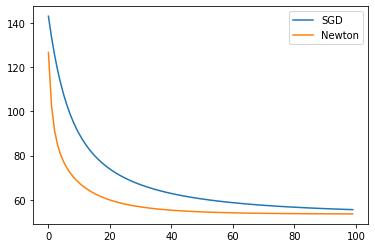

In [ ]:
# plot the result
plt.plot(loss_hist_batch, label="SGD")
plt.plot(loss_hist_newton, label="Newton")
plt.legend()

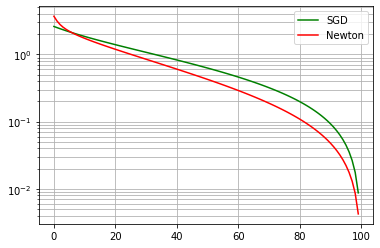

In [ ]:
#SGD
w_list_sgd = []
W = np.random.rand(x_d4.shape[1]-1)
lamb = 0.5
lr = 0.002
for i in range(100):
  w_list_sgd.append(W.copy())
  W -= lr * gradient(X, Y, W, lamb)
diff_sgd = [np.linalg.norm(w-W, ord=2) for w in w_list_sgd]
#Newton
w_list_newton = []
W = np.random.rand(x_d4.shape[1]-1)
lamb = 0.5
for i in range(100):
  w_list_newton.append(W.copy())
  H = hessian(X, Y, W, lamb)
  g = gradient(X, Y, W, lamb)
  d = np.dot(g, np.linalg.inv(H))
  W -= d
diff_newton = [np.linalg.norm(w-W, ord=2) for w in w_list_newton]

#Semilog Plot
plt.grid(True, which="both")
plt.semilogy(diff_sgd, c='g', label="SGD")
plt.semilogy(diff_newton, c='r', label="Newton")
plt.legend()

In [ ]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)

In [ ]:
X = x_d5[:,:-1]
Y = np.zeros((y_d5.size, y_d5.max()+1))
Y[np.arange(y_d5.size),y_d5] = 1

def softmax(X, W):
  ex = np.exp(np.dot(X, W.T))
  sig = ex.sum(axis=1)
  return ex / np.expand_dims(sig, 1).repeat(W.shape[1], axis=1)

def loss_func_mulc(X, Y, W, lamb):
  return -(Y*np.log(softmax(X, W))).sum() + lamb * np.trace(np.dot(W, W.T))

def gradient_mulc(X, Y, W, lamb):
  return np.dot((softmax(X, W)-Y).T, X) + 2*W

def hessian_mulc(X, Y, W, lamb):
  ex = np.exp(np.dot(X, W.T))
  sig = np.expand_dims(ex.sum(axis=1), 1).repeat(W.shape[1], axis=1)
  coe = (ex * (ex - sig) / sig**2)
  hess = []
  for i in range(W.shape[0]):
    hess.append(np.dot(X.T, X * np.expand_dims(coe[:,i], 1).repeat(W.shape[1], axis=1))+2*lamb)
  return np.array(hess)  

In [ ]:
#SGD
loss_sgd = []
w_list_sgd = []
W_sgd = W.copy()
lamb = 0.5
lr = 0.002
for i in range(100):
  w_list_sgd.append(W_sgd.copy())
  loss_sgd.append(loss_func_mulc(X, Y, W_sgd, lamb))
  W_sgd -=  lr * gradient_mulc(X, Y, W_sgd, lamb)
diff_sgd = [np.linalg.norm(w-W_sgd, ord=2) for w in w_list_sgd]
#Newton
loss_newton = []
w_list_newton = []
W_newton = W.copy()
lamb = 0.5
lr = 0.5
for i in range(100):
  loss_newton.append(loss_func_mulc(X, Y, W_newton, lamb))
  w_list_newton.append(W_newton.copy())
  H = hessian_mulc(X, Y, W_newton, lamb)
  g = gradient_mulc(X, Y, W_newton, lamb)
  d = np.array([np.dot(g[i], np.linalg.inv(H[i])) for i in range(W.shape[0])])
  W_newton += lr * d
diff_newton = [np.linalg.norm(w-W_newton, ord=2) for w in w_list_newton]

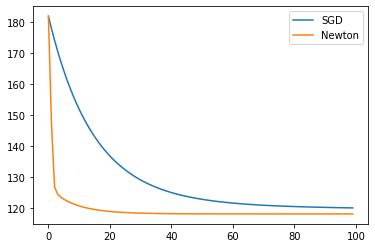

In [ ]:
#visualization of loss
plt.plot(loss_sgd, label="SGD")
plt.plot(loss_newton, label="Newton")
plt.legend()

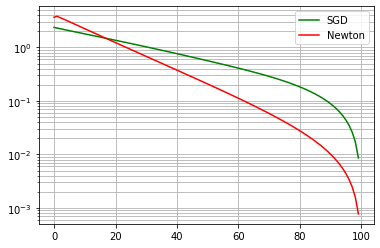

In [ ]:
#Semilog Plot
plt.grid(True, which="both")
plt.semilogy(diff_sgd, c='g', label="SGD")
plt.semilogy(diff_newton, c='r', label="Newton")
plt.legend()

# Problem 3 (3)

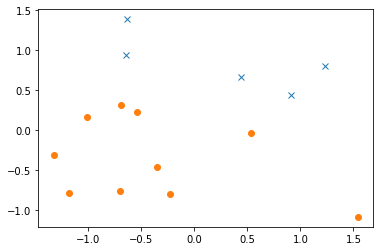

In [ ]:
# dataset 2
n = 15
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x_d2 = np.random.randn(n, 2) + 0
y_d2 = 2 * (omega * x_d2[:,0] + x_d2[:,1] + noise > 0) - 1

plt.plot(np.extract(y_d2>0,x_d2[:,0]),np.extract(y_d2>0,x_d2[:,1]), 'x')
plt.plot(np.extract(y_d2<0,x_d2[:,0]),np.extract(y_d2<0,x_d2[:,1]), 'o')

In [ ]:
def compute_k(X, Y):
  xy = X * np.expand_dims(Y, 1).repeat(X.shape[1], axis=1)
  return np.dot(xy, xy.T)

In [ ]:
def loss_func_csvm(X, Y, W, lamb):
  loss = np.column_stack((1-Y*np.dot(X, W), np.zeros((X.shape[0], 1)))).max(axis=1).sum()
  regu = lamb * (np.linalg.norm(W, ord=2)**2)
  return loss + regu

In [ ]:
def alpha2w(X, Y, lamb, alp):
  return (np.expand_dims(alp * Y, 1).repeat(X.shape[1], axis=1) * X).sum(axis=0) / (2*lamb)

In [ ]:
def loss_func_csvm_dual(K, alp, lamb):
  return alp.dot(K.dot(alp)) / (4*lamb) - alp.sum()

In [ ]:
def next_alp(alp, K, lamb, lr):
  alp_next = alp - lr * (K.dot(alp) / (2*lamb) - 1)
  return (alp_next - alp_next.min()) / (alp_next.max()-alp_next.min())

In [ ]:
#preparation of input and parameters
X = np.column_stack((x_d2,np.ones((x_d2.shape[0], 1))))
Y = y_d2
lamb = 0.5
K = compute_k(X, Y)
v, _ = np.linalg.eig(K)
lr = 1 / v.max().real

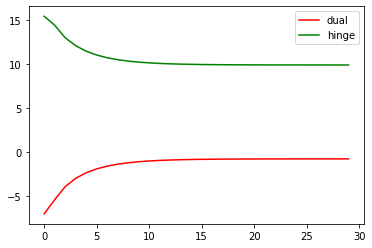

In [ ]:
#training and visualization of loss
alp_csvm = np.random.rand(X.shape[0])
score_alp = []
hinge_loss = []
regul_csvm = []
for i in range(30):
  W = alpha2w(X, Y, lamb, alp_csvm)
  score_alp.append(-loss_func_csvm_dual(K, alp_csvm, lamb))
  hinge_loss.append(loss_func_csvm(X, Y, W, lamb))
  regul_csvm.append(np.linalg.norm(W, ord=2))
  alp_csvm = next_alp(alp_csvm, K, lamb, lr)

plt.plot(score_alp, c='r', label="dual")
plt.plot(hinge_loss, c='g', label="hinge")
plt.legend()

<a list of 3 text.Text objects>

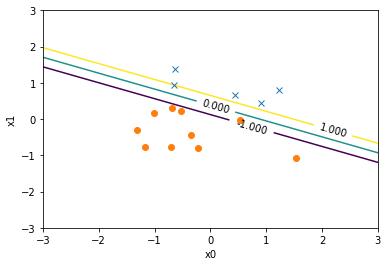

In [ ]:
#visualization of margin boundary
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('x0')
plt.ylabel('x1')
plt.plot(np.extract(y_d2>0,x_d2[:,0]),np.extract(y_d2>0,x_d2[:,1]), 'x')
plt.plot(np.extract(y_d2<0,x_d2[:,0]),np.extract(y_d2<0,x_d2[:,1]), 'o')
x_0 = np.arange(-3, 4, 0.1)
x_1 = np.arange(-3, 4, 0.1)
w = alpha2w(X, Y, lamb, alp_csvm)
z = np.empty((len(x_0),len(x_1)),dtype='float')
for i in range(len(x_1)):
  for j in range(len(x_0)):
    z[i][j] = x_0[j]*w[0]+x_1[i]*w[1]+w[2]
contour = plt.contour(x_0, x_1, z, [-1, 0, 1])
plt.clabel(contour, colors=('k'))

# Problem 5 (2)

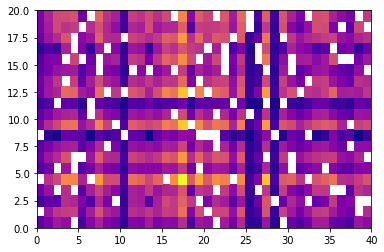

In [183]:
#dataset3
np.random.seed(1234)
m = 20
n = 40
r = 2
A = np.dot(np.random.rand(m, r), np.random.rand(r, n)).flatten()
ninc = 100
Q = np.random.permutation(m * n)[:ninc]
A[Q] = None
A = A.reshape(m, n)

plt.pcolor(A, cmap=plt.cm.plasma)

In [184]:
A1 = A.copy()
A1.reshape(m * n)[Q] = 0
A1.reshape(m, n)
Z = np.random.rand(m, n)
lo = 1.5

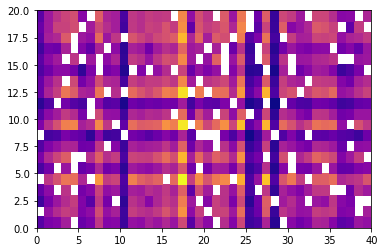

In [185]:
for i in range(20):
  u, s, vh = np.linalg.svd((A1+lo*Z), full_matrices=False, compute_uv=True)
  s1 = s-lo
  for i in s1:
    if i < 0:
       i = 0
  Z = np.dot(np.dot(u, np.diag(s1)), vh)

Z_res = Z.copy()
Z_res.reshape(m * n)[Q] = None
Z_res.reshape(m, n)
plt.pcolor(Z_res, cmap=plt.cm.plasma)

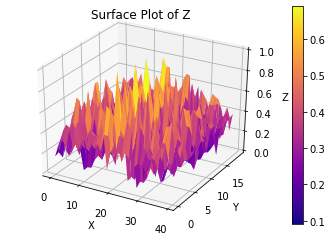

In [186]:
#surface plot
xcoord = np.linspace(0, m-1, m)
ycoord = np.linspace(0, n-1, n)
Xcoord, Ycoord = np.meshgrid(ycoord, xcoord)
Z = (Z - Z.min()) / (Z.max() - Z.min())
fig = plt.figure()
ax3d = plt.axes(projection='3d')
surf = ax3d.plot_surface(Xcoord, Ycoord, Z, cmap="plasma")
fig.colorbar(surf, ax=ax3d)
ax3d.set_title('Surface Plot of Z')
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')
plt.show()